Microdados Do Enem - Escolaridade dos pais x Notas dos participantes 

Em uma pesquisa sobre os dados do Enem eu achei bem interessante essa questão das Escolaridade dos Pais x Nota dos Participantes, acho que de uma primeira visão não imaginamos que poderia influenciar uma coisa na outra, pois muitas vezes ouvimos que isso não tem muita ligação que se a pessoa correr atrás e querer ela consegue, mas veremos a seguir como realmente isso ocorre.

In [1]:
import pandas as pd
import numpy as np
import matplotlib

In [2]:
microdadosEnem = pd.read_csv("MICRODADOS_ENEM_2022.csv", sep = ';', encoding = 'ISO-8859-1') #Importando os arquivos
microdadosEnem.head() #Obtendo uma amostra do arquivo

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A


In [3]:
microdadosEnem.columns.values #Para pegar quais colunas tem no csv

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [4]:
ColunasSelecionadas = ['NU_INSCRICAO', 'NU_NOTA_MT',
                        'NU_NOTA_REDACAO','Q001', 'Q002'] #selecionando as colunas que vou querer usar do csv e atribuindo elas a uma variavel

In [5]:
microdadosEnemSelecionado = microdadosEnem.filter(items=ColunasSelecionadas) #Filtrando os dados 

In [6]:
microdadosEnemSelecionado.head() #Como podemos ver meu arquivo agora fica somente com as colunas que selecionei

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,210057943671,NaN,NaN,A,A
1,210057516120,NaN,NaN,D,D
2,210057280536,565.3,760.0,E,F
3,210055724397,416.0,320.0,C,A
4,210055097896,NaN,NaN,D,B


In [7]:
microdadosEnemSelecionado = microdadosEnemSelecionado.dropna() #Esse estou utilizando para retirar os valores nulos (NaN)

In [8]:
microdadosEnemSelecionado.head() #Como podemos ver aqui, sem os Nan

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
2,210057280536,565.3,760.0,E,F
3,210055724397,416.0,320.0,C,A
7,210055778089,404.9,440.0,E,E
9,210055461467,435.3,360.0,E,E
11,210054972570,456.8,940.0,E,E


In [9]:
q001eq002Dicionario = {
    'A': 'Nunca estudou.',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
    'G': 'Completou a Pós-graduação.',
    'H': 'Não sei.' } # Aqui montei um dicionário com as opções de escolaridade dos pais .

In [10]:
microdadosEnemSelecionado.filter(items=['Q001','NU_INSCRICAO']).groupby('Q001').count() #Este serve para eu agrupar por cada tipo de escolaridade dos pais e a quantidade de cada.

,NU_INSCRICAO
Q001,
A,75867
B,350284
C,291859
D,259673
E,720913
F,250540
G,193050
H,202637


In [11]:
microdadosEnemSelecionado['NO_Q001'] = [q001eq002Dicionario[resp] for resp in microdadosEnemSelecionado.Q001 ] # Aqui eu estou atribuindo o dicionário que montamos a uma nova coluna no arquivo, referente a "Q001" que é a escolaridade dos pais

In [12]:
microdadosEnemSelecionado['NO_Q002'] = [q001eq002Dicionario[resp] for resp in microdadosEnemSelecionado.Q002 ] #Aqui a mesma coisa de cima mas com o "Q002" que é a escolaridade das mães.

In [13]:
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
2,210057280536,565.3,760.0,E,F,"Completou o Ensino Médio, mas não completou a ...","Completou a Faculdade, mas não completou a Pós..."
3,210055724397,416.0,320.0,C,A,"Completou a 4ª série/5º ano, mas não completou...",Nunca estudou.
7,210055778089,404.9,440.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."
9,210055461467,435.3,360.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."
11,210054972570,456.8,940.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."


In [14]:
microdadosEnemSelecionado.filter(items=['NO_Q001','NU_INSCRICAO']).groupby('NO_Q001').count().sort_values(by='NU_INSCRICAO', ascending=False) #E aqui podemos ver já com os dados escritos da escolaridade dos pais.

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade.",720913
Não completou a 4ª série/5º ano do Ensino Fundamental.,350284
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",291859
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",259673
"Completou a Faculdade, mas não completou a Pós-graduação.",250540
Não sei.,202637
Completou a Pós-graduação.,193050
Nunca estudou.,75867


In [15]:
microdadosEnemSelecionado.filter(items=['NO_Q002','NU_INSCRICAO']).groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', ascending=False) #E aqui podemos ver já com os dados escritos da escolaridade das mães.

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade.",851162
"Completou a Faculdade, mas não completou a Pós-graduação.",329384
Completou a Pós-graduação.,322603
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",262334
Não completou a 4ª série/5º ano do Ensino Fundamental.,238683
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",232165
Não sei.,62486
Nunca estudou.,46006


Como temos uma grande variedade eu escolhi olharmos para as notas de Matemática e a de Redação

In [16]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_MT','NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT', ascending=False)
#Aqui podemos ver a média da nota de matemática dos alunos de acordo com a escolaridade dos pais

,NU_NOTA_MT
NO_Q001,
Completou a Pós-graduação.,622.681863
"Completou a Faculdade, mas não completou a Pós-graduação.",606.265275
"Completou o Ensino Médio, mas não completou a Faculdade.",550.539180
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",528.257192
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",518.945360
Não sei.,509.209243
Não completou a 4ª série/5º ano do Ensino Fundamental.,500.422448
Nunca estudou.,477.496748


<Axes: xlabel='NO_Q001'>

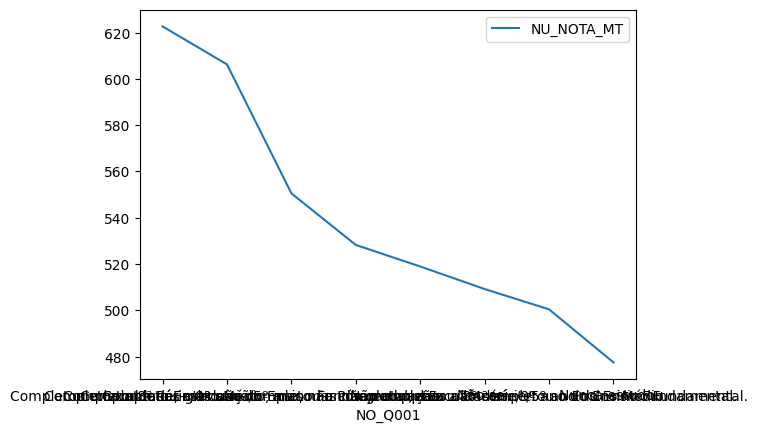

In [17]:
q001Mat = microdadosEnemSelecionado.filter(items=['NU_NOTA_MT','NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT', ascending=False)
q001Mat.plot()

In [18]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_MT','NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_MT', ascending=False)
#Aqui podemos ver a média da nota de matemática dos alunos de acordo com a escolaridade das mães

,NU_NOTA_MT
NO_Q002,
Completou a Pós-graduação.,602.375859
"Completou a Faculdade, mas não completou a Pós-graduação.",591.089336
"Completou o Ensino Médio, mas não completou a Faculdade.",540.254915
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",515.969635
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",507.631458
Não sei.,497.162744
Não completou a 4ª série/5º ano do Ensino Fundamental.,492.413723
Nunca estudou.,470.632798


<Axes: xlabel='NO_Q002'>

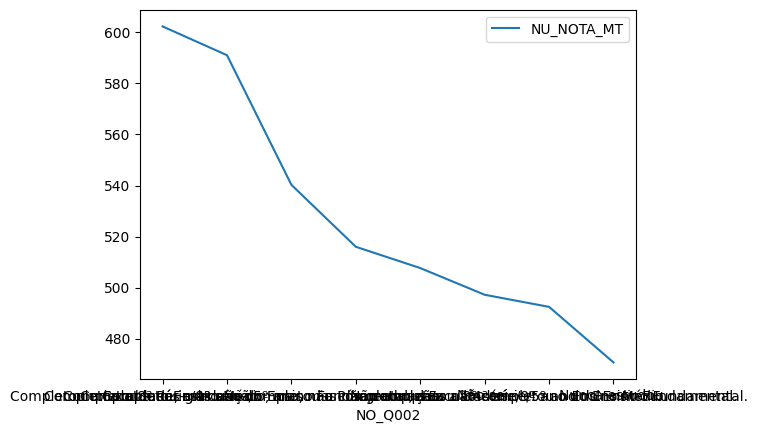

In [19]:
q002Mat = microdadosEnemSelecionado.filter(items=['NU_NOTA_MT','NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_MT', ascending=False)
q002Mat.plot()

In [20]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)
#Aqui podemos ver a média da nota de Redação dos alunos de acordo com a escolaridade dos pais.

,NU_NOTA_REDACAO
NO_Q001,
Completou a Pós-graduação.,736.997565
"Completou a Faculdade, mas não completou a Pós-graduação.",715.404007
"Completou o Ensino Médio, mas não completou a Faculdade.",646.213621
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",612.782846
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",596.927078
Não sei.,568.765230
Não completou a 4ª série/5º ano do Ensino Fundamental.,568.412945
Nunca estudou.,523.250952


<Axes: xlabel='NO_Q001'>

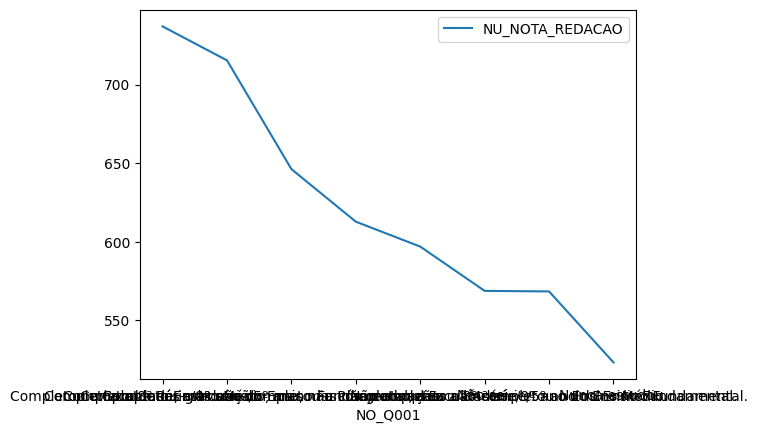

In [21]:
q001Redacao = microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)
q001Redacao.plot()

In [22]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)
#Aqui podemos ver a média da nota de Redação dos alunos de acordo com a escolaridade das mães.

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação.,716.894449
"Completou a Faculdade, mas não completou a Pós-graduação.",697.592051
"Completou o Ensino Médio, mas não completou a Faculdade.",630.876801
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",591.665053
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",576.363104
Não completou a 4ª série/5º ano do Ensino Fundamental.,551.248476
Não sei.,529.589668
Nunca estudou.,501.226362


In [23]:
q002Redacao = microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

<Axes: xlabel='NO_Q002'>

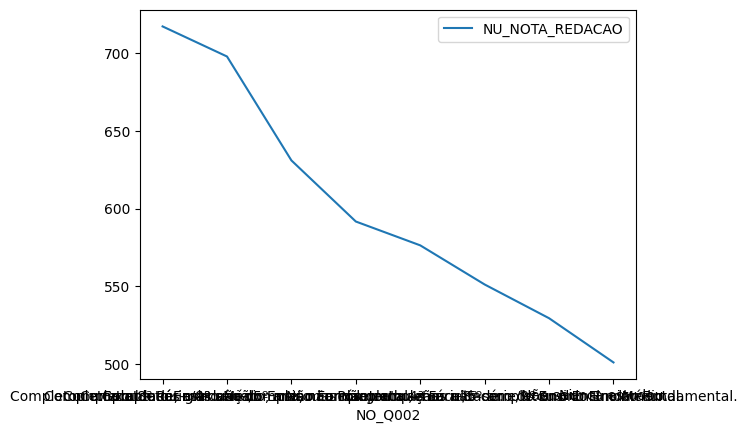

In [24]:
q002Redacao.plot()

Para termos uma visão mais geral, vou usar o "Describe" que conseguimos ter uma visão mais geral.

In [25]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_MT','NO_Q001']).groupby('NO_Q001').describe()

NU_NOTA_MT              \
                                                        count        mean   
NO_Q001                                                                     
Completou a 4ª série/5º ano, mas não completou ...   291859.0  518.945360   
Completou a 8ª série/9º ano do Ensino Fundament...   259673.0  528.257192   
Completou a Faculdade, mas não completou a Pós-...   250540.0  606.265275   
Completou a Pós-graduação.                           193050.0  622.681863   
Completou o Ensino Médio, mas não completou a F...   720913.0  550.539180   
Nunca estudou.                                        75867.0  477.496748   
Não completou a 4ª série/5º ano do Ensino Funda...   350284.0  500.422448   
Não sei.                                             202637.0  509.209243   

                                                                            \
                                                           std  min    25%   
NO_Q001                                                                      
Completou a 4ª série/5º ano, mas não completou ...  103.407595  0.0  436.4   
Completou a 8ª série/9º ano do Ensino Fundament...  106.190979  0.0  443.5   
Completou a Faculdade, mas não completou a Pós-...  122.087029  0.0  515.2   
Completou a Pós-graduação.                          125.511626  0.0  531.9   
Completou o Ensino Médio, mas não completou a F...  112.042934  0.0  461.2   
Nunca estudou.                                       89.030226  0.0  409.1   
Não completou a 4ª série/5º ano do Ensino Funda...   96.988334  0.0  423.9   
Não sei.                                            101.109960  0.0  429.3   

                                                                         
                                                      50%    75%    max  
NO_Q001                                                                  
Completou a 4ª série/5º ano, mas não completou ...  506.0  590.7  981.3  
Completou a 8ª série/9º ano do Ensino Fundament...  517.2  602.2  983.9  
Completou a Faculdade, mas não completou a Pós-...  609.6  689.8  985.7  
Completou a Pós-graduação.                          627.7  709.3  985.7  
Completou o Ensino Médio, mas não completou a F...  544.5  628.5  985.7  
Nunca estudou.                                      460.0  530.8  964.2  
Não completou a 4ª série/5º ano do Ensino Funda...  484.7  565.5  978.0  
Não sei.                                            493.7  577.6  972.6

In [26]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_MT','NO_Q002']).groupby('NO_Q002').describe()

NU_NOTA_MT              \
                                                        count        mean   
NO_Q002                                                                     
Completou a 4ª série/5º ano, mas não completou ...   232165.0  507.631458   
Completou a 8ª série/9º ano do Ensino Fundament...   262334.0  515.969635   
Completou a Faculdade, mas não completou a Pós-...   329384.0  591.089336   
Completou a Pós-graduação.                           322603.0  602.375859   
Completou o Ensino Médio, mas não completou a F...   851162.0  540.254915   
Nunca estudou.                                        46006.0  470.632798   
Não completou a 4ª série/5º ano do Ensino Funda...   238683.0  492.413723   
Não sei.                                              62486.0  497.162744   

                                                                            \
                                                           std  min    25%   
NO_Q002                                                                      
Completou a 4ª série/5º ano, mas não completou ...   99.295700  0.0  429.1   
Completou a 8ª série/9º ano do Ensino Fundament...  101.654094  0.0  435.1   
Completou a Faculdade, mas não completou a Pós-...  122.400286  0.0  496.6   
Completou a Pós-graduação.                          124.273669  0.0  507.7   
Completou o Ensino Médio, mas não completou a F...  109.420541  0.0  452.7   
Nunca estudou.                                       86.264121  0.0  405.5   
Não completou a 4ª série/5º ano do Ensino Funda...   93.527965  0.0  419.0   
Não sei.                                             99.671611  0.0  419.6   

                                                                         
                                                      50%    75%    max  
NO_Q002                                                                  
Completou a 4ª série/5º ano, mas não completou ...  493.0  575.0  985.7  
Completou a 8ª série/9º ano do Ensino Fundament...  502.8  586.4  975.0  
Completou a Faculdade, mas não completou a Pós-...  592.2  675.2  985.7  
Completou a Pós-graduação.                          605.2  687.9  985.7  
Completou o Ensino Médio, mas não completou a F...  531.7  616.7  985.7  
Nunca estudou.                                      452.8  520.7  903.9  
Não completou a 4ª série/5º ano do Ensino Funda...  476.4  554.2  983.2  
Não sei.                                            478.2  560.9  972.6

In [27]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q001']).groupby('NO_Q001').describe()

NU_NOTA_REDACAO  \
                                                             count   
NO_Q001                                                              
Completou a 4ª série/5º ano, mas não completou ...        291859.0   
Completou a 8ª série/9º ano do Ensino Fundament...        259673.0   
Completou a Faculdade, mas não completou a Pós-...        250540.0   
Completou a Pós-graduação.                                193050.0   
Completou o Ensino Médio, mas não completou a F...        720913.0   
Nunca estudou.                                             75867.0   
Não completou a 4ª série/5º ano do Ensino Funda...        350284.0   
Não sei.                                                  202637.0   

                                                                            \
                                                          mean         std   
NO_Q001                                                                      
Completou a 4ª série/5º ano, mas não completou ...  596.927078  203.846028   
Completou a 8ª série/9º ano do Ensino Fundament...  612.782846  202.074414   
Completou a Faculdade, mas não completou a Pós-...  715.404007  175.596940   
Completou a Pós-graduação.                          736.997565  171.103241   
Completou o Ensino Médio, mas não completou a F...  646.213621  193.566636   
Nunca estudou.                                      523.250952  213.191852   
Não completou a 4ª série/5º ano do Ensino Funda...  568.412945  202.856535   
Não sei.                                            568.765230  212.515644   

                                                                              \
                                                    min    25%    50%    75%   
NO_Q001                                                                        
Completou a 4ª série/5º ano, mas não completou ...  0.0  520.0  600.0  720.0   
Completou a 8ª série/9º ano do Ensino Fundament...  0.0  520.0  620.0  740.0   
Completou a Faculdade, mas não completou a Pós-...  0.0  620.0  740.0  860.0   
Completou a Pós-graduação.                          0.0  640.0  760.0  880.0   
Completou o Ensino Médio, mas não completou a F...  0.0  560.0  640.0  780.0   
Nunca estudou.                                      0.0  440.0  560.0  640.0   
Não completou a 4ª série/5º ano do Ensino Funda...  0.0  480.0  580.0  680.0   
Não sei.                                            0.0  480.0  580.0  700.0   

                                                            
                                                       max  
NO_Q001                                                     
Completou a 4ª série/5º ano, mas não completou ...  1000.0  
Completou a 8ª série/9º ano do Ensino Fundament...   980.0  
Completou a Faculdade, mas não completou a Pós-...  1000.0  
Completou a Pós-graduação.                          1000.0  
Completou o Ensino Médio, mas não completou a F...  1000.0  
Nunca estudou.                                       980.0  
Não completou a 4ª série/5º ano do Ensino Funda...  1000.0  
Não sei.                                            1000.0

In [28]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q002']).groupby('NO_Q002').describe()

NU_NOTA_REDACAO  \
                                                             count   
NO_Q002                                                              
Completou a 4ª série/5º ano, mas não completou ...        232165.0   
Completou a 8ª série/9º ano do Ensino Fundament...        262334.0   
Completou a Faculdade, mas não completou a Pós-...        329384.0   
Completou a Pós-graduação.                                322603.0   
Completou o Ensino Médio, mas não completou a F...        851162.0   
Nunca estudou.                                             46006.0   
Não completou a 4ª série/5º ano do Ensino Funda...        238683.0   
Não sei.                                                   62486.0   

                                                                            \
                                                          mean         std   
NO_Q002                                                                      
Completou a 4ª série/5º ano, mas não completou ...  576.363104  204.275752   
Completou a 8ª série/9º ano do Ensino Fundament...  591.665053  203.485493   
Completou a Faculdade, mas não completou a Pós-...  697.592051  182.926605   
Completou a Pós-graduação.                          716.894449  179.339388   
Completou o Ensino Médio, mas não completou a F...  630.876801  196.377895   
Nunca estudou.                                      501.226362  212.017885   
Não completou a 4ª série/5º ano do Ensino Funda...  551.248476  203.270421   
Não sei.                                            529.589668  224.152111   

                                                                              \
                                                    min    25%    50%    75%   
NO_Q002                                                                        
Completou a 4ª série/5º ano, mas não completou ...  0.0  500.0  580.0  700.0   
Completou a 8ª série/9º ano do Ensino Fundament...  0.0  520.0  600.0  720.0   
Completou a Faculdade, mas não completou a Pós-...  0.0  600.0  720.0  840.0   
Completou a Pós-graduação.                          0.0  620.0  740.0  860.0   
Completou o Ensino Médio, mas não completou a F...  0.0  540.0  640.0  760.0   
Nunca estudou.                                      0.0  420.0  540.0  620.0   
Não completou a 4ª série/5º ano do Ensino Funda...  0.0  480.0  560.0  660.0   
Não sei.                                            0.0  440.0  560.0  660.0   

                                                            
                                                       max  
NO_Q002                                                     
Completou a 4ª série/5º ano, mas não completou ...  1000.0  
Completou a 8ª série/9º ano do Ensino Fundament...  1000.0  
Completou a Faculdade, mas não completou a Pós-...  1000.0  
Completou a Pós-graduação.                          1000.0  
Completou o Ensino Médio, mas não completou a F...  1000.0  
Nunca estudou.                                       980.0  
Não completou a 4ª série/5º ano do Ensino Funda...  1000.0  
Não sei.                                             980.0

Resultado Final:

Como podemos ver de acordo com essas análises que temos a escolaridade dos pais infliuencia sim e muito na nota dos filhos no Enem e em sua escolaridade, podemos pensar por uma lado em que os
jovens cresceram em um lar mais informado e mais preparado nesse quesito educacional, mas podemos olhar também para um lado financeiro, onde os pais mais intruidos e com graus de escolaridade mais avançados tendem a ter cargos melhores, salários melhores o que pode refletir no filho ter uma escolaridade mais avançada, mais acessos e também mais conforto para poder estudar.